# Basic Example

This short notebook shows how to get started with HiggsDNA and [Coffea](https://github.com/CoffeaTeam/coffea).

In [1]:
import awkward as ak
import numpy as np
import hist
import json
from importlib import resources
import matplotlib.pyplot as plt

In [11]:
#fileset = ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_ctag_test/ggh_M125_2017/nominal/")
fileset = ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/higgs_dna_HpC_signal_samples_multiclass_fixed_variables_241111/merged/ggh_M125_2017/NOTAG_merged.parquet")

In [12]:
for f in fileset.fields:
    if ("weight" in f) and ("cTag" in f):
        print(f)

weight_cTagSF_LHEScaleWeight_muFDown
weight_cTagSF_StatDown
weight_cTagSF_XSec_BRUnc_DYJets_bDown
weight_cTagSF_XSec_BRUnc_WJets_cDown
weight_cTagSF_ExtrapDown
weight_cTagSF_PUWeightDown
weight_cTagSF_XSec_BRUnc_DYJets_cUp
weight_cTagSF_XSec_BRUnc_WJets_cUp
weight_cTagSF_PSWeightFSRDown
weight_cTagSF_LHEScaleWeight_muRDown
weight_cTagSF_InterpUp
weight_cTagSF_PUWeightUp
weight_cTagSF_PSWeightISRDown
weight_cTagSF_jesTotalUp
weight_cTagSF_XSec_BRUnc_DYJets_cDown
weight_cTagSF_jerUp
weight_cTagSF_jerDown
weight_cTagSF_LHEScaleWeight_muFUp
weight_cTagSF_InterpDown
weight_cTagSF_XSec_BRUnc_DYJets_bUp
weight_cTagSF_jesTotalDown
weight_cTagSF_PSWeightISRUp
weight_cTagSF_ExtrapUp
weight_cTagSF_LHEScaleWeight_muRUp
weight_cTagSF_PSWeightFSRUp
weight_cTagSF_StatUp


In [13]:
variations_jets = [
    "jesTotal",
    "jer",
]
variations_Xsec = [
    "XSec_BRUnc_DYJets_b",
    "XSec_BRUnc_WJets_c",
    "XSec_BRUnc_DYJets_c",
]
variations_ps = [
    "PSWeightFSR",
    "PSWeightISR",
]
variations_lhe = [
    "LHEScaleWeight_muF",
    "LHEScaleWeight_muR",
]
variations_other = [
    "Stat",
    "Extrap",
    "PUWeight",
    "Interp",
]

In [14]:
variations_jets = [ 
    "jesTotal",
    "jer",
]
variations_Xsec = [
    "XSec_BRUnc_DYJets_b",
    "XSec_BRUnc_DYJets_c",
    "XSec_BRUnc_WJets_c",
]
variations_ps = [
    "PSWeightISR",
    "PSWeightFSR",
]
variations_lhe = [
    "LHEScaleWeight_muF",
    "LHEScaleWeight_muR",
]
variations_other = [  
    "Stat",
    "Extrap",
    "PUWeight",
    "Interp",
]

/tmp/ipykernel_53324/2930809016.py:83: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["nominal"],


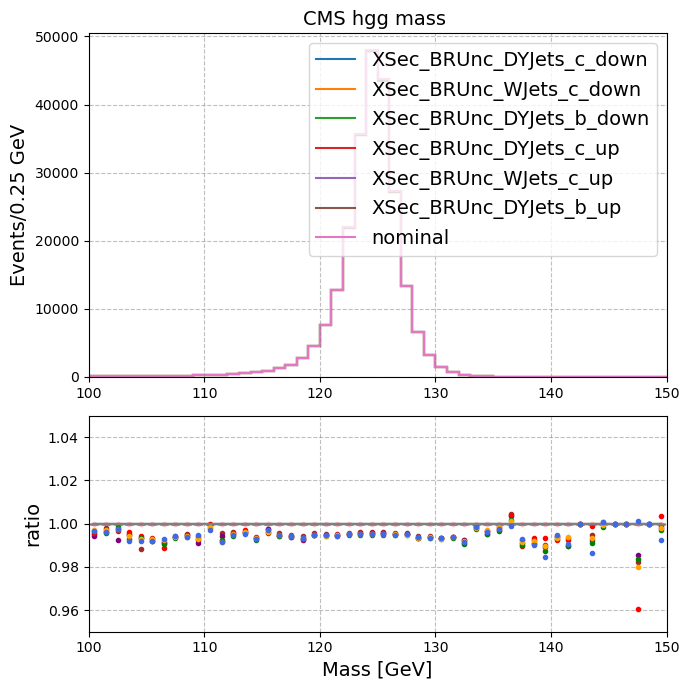

<Figure size 640x480 with 0 Axes>

In [15]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 150
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "nominal", 
        "XSec_BRUnc_DYJets_b_up",
        "XSec_BRUnc_WJets_c_up",
        "XSec_BRUnc_DYJets_c_up",
        "XSec_BRUnc_DYJets_b_down",
        "XSec_BRUnc_WJets_c_down",
        "XSec_BRUnc_DYJets_c_down",
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

full_hist.fill(ax = fileset[var], weight = fileset["weight_central"], c="nominal")
full_hist_err.fill(ax = fileset[var], weight = fileset["weight_central"]**2, c="nominal")
for syst in variations_Xsec:
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"], c=f"{syst}_up")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"]**2, c=f"{syst}_up")
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"], c=f"{syst}_down")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"]**2, c=f"{syst}_down")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["pink", "brown", "purple", "red", "green", "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["nominal"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="nominal")
    ax1.plot(mc["edges"][sample][:-1], ratio, color=colours[j], marker=".", linestyle="", label=sample)

ax1.set_ylim([0.95,1.05])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/Xsec_variations_{var}.pdf")

nominal purple
jesTotal_up red
jer_up green
jesTotal_down orange
jer_down royalblue


/tmp/ipykernel_53324/1640739796.py:73: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["nominal"],


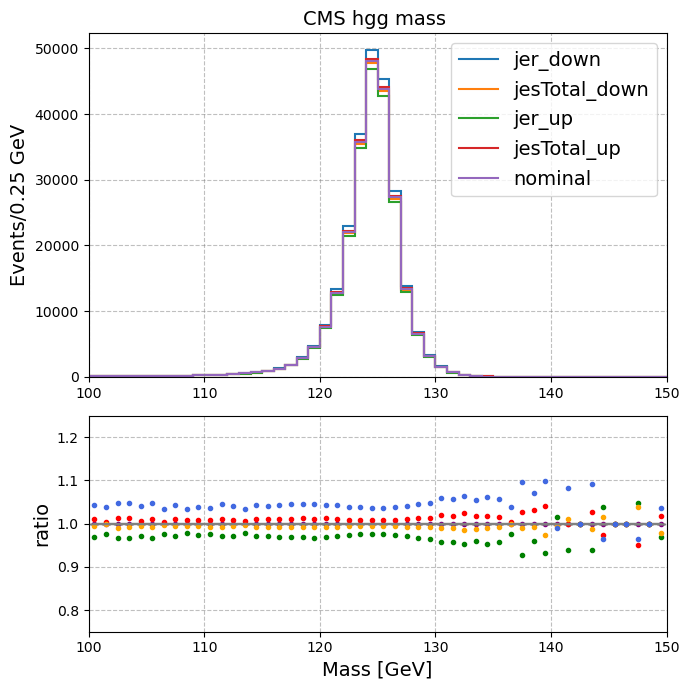

<Figure size 640x480 with 0 Axes>

In [16]:
# jet variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 150
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["nominal", "jesTotal_up", "jer_up", "jesTotal_down", "jer_down"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

full_hist.fill(ax = fileset[var], weight = fileset["weight_central"], c="nominal")
full_hist_err.fill(ax = fileset[var], weight = fileset["weight_central"]**2, c="nominal")
for syst in variations_jets:
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"], c=f"{syst}_up")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"]**2, c=f"{syst}_up")
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"], c=f"{syst}_down")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"]**2, c=f"{syst}_down")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["purple", "red", "green", "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    print(sample, colours[j])
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["nominal"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="nominal")
    ax1.plot(mc["edges"][sample][:-1], ratio, color=colours[j], marker=".", linestyle="", label=sample)

ax1.set_ylim([0.75,1.25])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/XSec_var_{var}.pdf")

nominal purple
PSWeightFSR_up red
PSWeightISR_up green
PSWeightFSR_down orange
PSWeightISR_down royalblue


/tmp/ipykernel_53324/1049727785.py:82: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["nominal"],


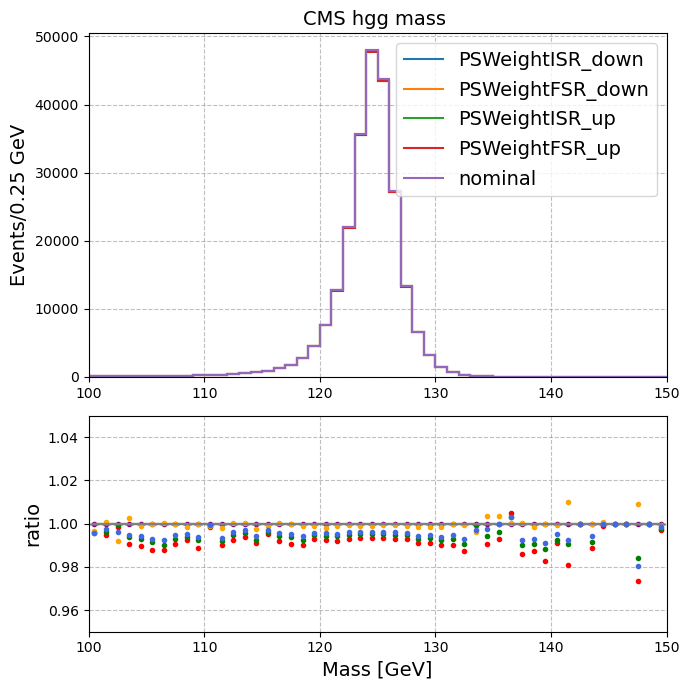

<Figure size 640x480 with 0 Axes>

In [17]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 150
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "nominal", 
        "PSWeightFSR_up",
        "PSWeightISR_up",
        "PSWeightFSR_down",
        "PSWeightISR_down",
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

full_hist.fill(ax = fileset[var], weight = fileset["weight_central"], c="nominal")
full_hist_err.fill(ax = fileset[var], weight = fileset["weight_central"]**2, c="nominal")
for syst in variations_ps:
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"], c=f"{syst}_up")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"]**2, c=f"{syst}_up")
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"], c=f"{syst}_down")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"]**2, c=f"{syst}_down")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["purple", "red", "green", "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    print(sample, colours[j])
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["nominal"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="nominal")
    ax1.plot(mc["edges"][sample][:-1], ratio, color=colours[j], marker=".", linestyle="", label=sample)

ax1.set_ylim([0.95,1.05])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/PS_variations_{var}.pdf")

nominal purple
LHEScaleWeight_muF_up red
LHEScaleWeight_muF_down green
LHEScaleWeight_muR_up orange
LHEScaleWeight_muR_down royalblue


/tmp/ipykernel_53324/1859503473.py:82: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["nominal"],


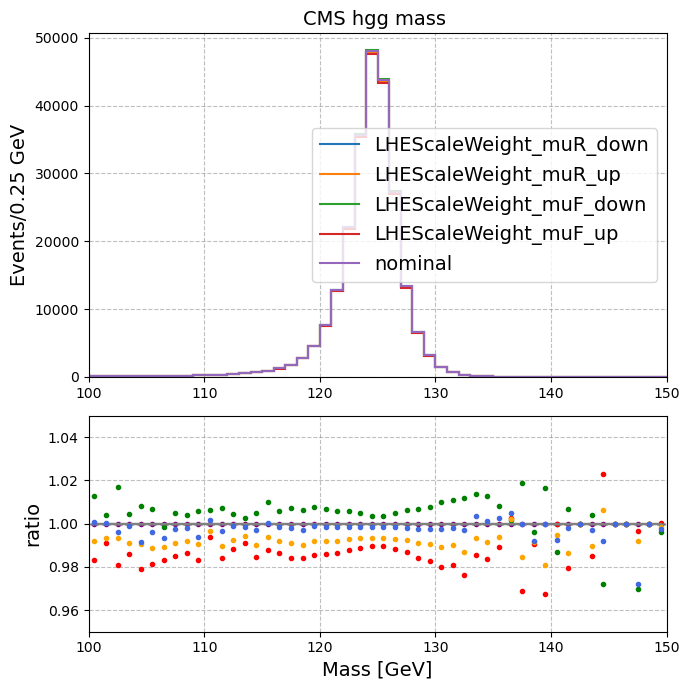

<Figure size 640x480 with 0 Axes>

In [18]:
# lhe variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 150
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "nominal", 
        "LHEScaleWeight_muF_up",
        "LHEScaleWeight_muF_down",
        "LHEScaleWeight_muR_up",
        "LHEScaleWeight_muR_down",
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

full_hist.fill(ax = fileset[var], weight = fileset["weight_central"], c="nominal")
full_hist_err.fill(ax = fileset[var], weight = fileset["weight_central"]**2, c="nominal")
for syst in variations_lhe:
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"], c=f"{syst}_up")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"]**2, c=f"{syst}_up")
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"], c=f"{syst}_down")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"]**2, c=f"{syst}_down")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["purple", "red", "green", "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    print(sample, colours[j])
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["nominal"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="nominal")
    ax1.plot(mc["edges"][sample][:-1], ratio, color=colours[j], marker=".", linestyle="", label=sample)

ax1.set_ylim([0.95,1.05])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/PS_variations_{var}.pdf")

nominal olive
Stat_up grey
Stat_down pink
Extrap_up brown
Extrap_down purple
PUWeight_up red
PUWeight_down green
Interp_up orange
Interp_down royalblue


/tmp/ipykernel_53324/3066459732.py:86: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["nominal"],


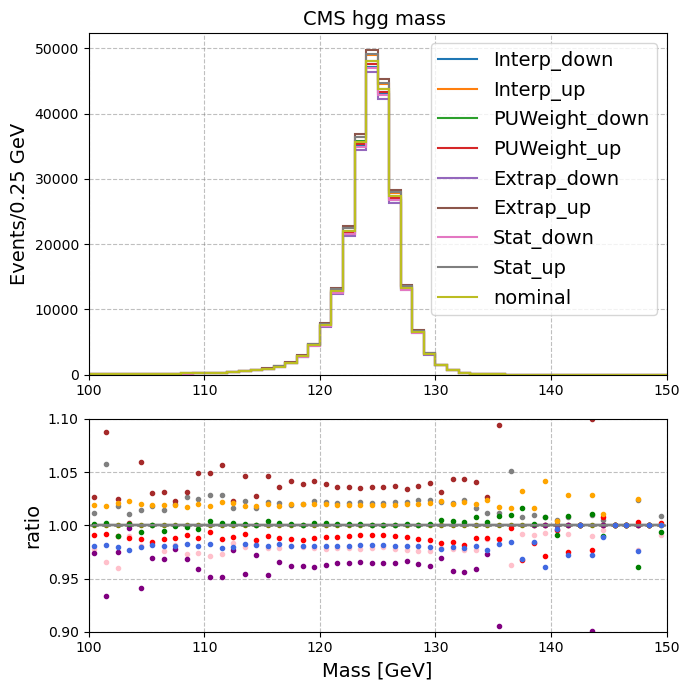

<Figure size 640x480 with 0 Axes>

In [19]:
# lhe variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 150
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "nominal", 
        "Stat_up",
        "Stat_down",
        "Extrap_up",
        "Extrap_down",
        "PUWeight_up",
        "PUWeight_down",
        "Interp_up",
        "Interp_down",
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

full_hist.fill(ax = fileset[var], weight = fileset["weight_central"], c="nominal")
full_hist_err.fill(ax = fileset[var], weight = fileset["weight_central"]**2, c="nominal")
for syst in variations_other:
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"], c=f"{syst}_up")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Up"]**2, c=f"{syst}_up")
    full_hist.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"], c=f"{syst}_down")
    full_hist_err.fill(ax = fileset[var], weight = fileset[f"weight_cTagSF_{syst}Down"]**2, c=f"{syst}_down")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["olive","grey", "pink", "brown", "purple", "red", "green", "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    print(sample, colours[j])
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["nominal"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="nominal")
    ax1.plot(mc["edges"][sample][:-1], ratio, color=colours[j], marker=".", linestyle="", label=sample)

ax1.set_ylim([0.9,1.1])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/other_variations_{var}.pdf")